In [6]:
import sys
sys.path.append("/home/wanxinli/EHR-OT/")

import matplotlib.pyplot as plt
from mimic_common import *
import os
import pandas as pd

/home/wanxinli/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
trans_metrics = ['OT', 'TCA', 'MMD']
score_dir = "/home/wanxinli/EHR-OT/outputs/mimic/"

In [8]:

def ratios_for_metrics(eval_metric, trans_metrics):
    """ 
    Compute ratios for the evaluation metrics (eval_metric)

    :param str eval_metric: evaluation metric, mae or rmse
    :param str trans_metric: transporting metric, OT, TCA or MMD
    """

    metric_improve_ratios = []
    for trans_metric in trans_metrics:
        score_path = os.path.join(score_dir, f"exp4_{trans_metric}_linear_score.csv")
        score_df = pd.read_csv(score_path, header=0, index_col=0)

        # compute improvements in terms of ratio
        metric_improve_ratios.append(compute_metric_ratio(score_df, eval_metric))

    return metric_improve_ratios


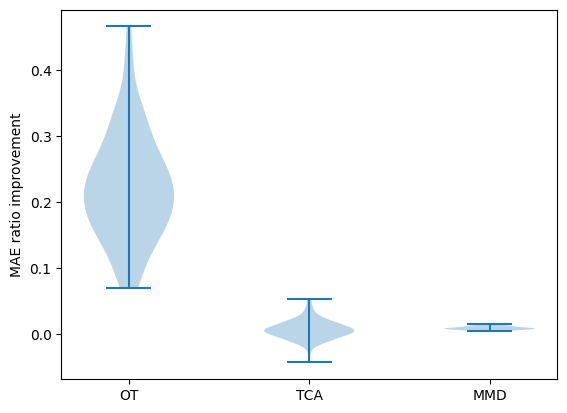

In [9]:
mae_improve_ratios = ratios_for_metrics('mae', trans_metrics)

# Pandas dataframe
data = pd.DataFrame({
    trans_metrics[0]: mae_improve_ratios[0],
    trans_metrics[1]: mae_improve_ratios[1], 
    trans_metrics[2]: mae_improve_ratios[2]
})

# Plot the dataframe
plt.violinplot(data)
plt.xticks([1, 2, 3], labels=['OT', 'TCA', 'MMD'])
plt.ylabel("MAE ratio improvement")
plt.show()



          OT       TCA       MMD
0   0.115612  0.003083  0.005621
1   0.115458  0.000092  0.012702
2   0.139599  0.010559  0.012664
3   0.054253 -0.003573  0.009720
4   0.094470  0.001665  0.015421
..       ...       ...       ...
95  0.193533  0.002876  0.010694
96  0.282662 -0.018284  0.010439
97  0.164066  0.012131  0.008867
98  0.227868  0.004673  0.008394
99  0.067708 -0.006667  0.004157

[100 rows x 3 columns]


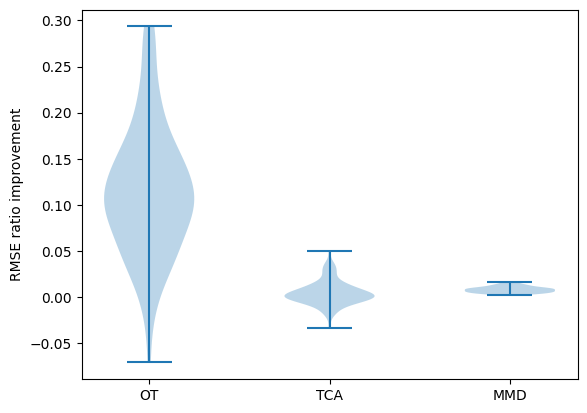

In [10]:
rmse_improve_ratios = ratios_for_metrics('rmse', trans_metrics)

# Pandas dataframe
data = pd.DataFrame({
    trans_metrics[0]: rmse_improve_ratios[0],
    trans_metrics[1]: rmse_improve_ratios[1], 
    trans_metrics[2]: rmse_improve_ratios[2]
})
print(data)

# Plot the dataframe
plt.violinplot(data)
plt.xticks([1, 2, 3], labels=['OT', 'TCA', 'MMD'])
plt.ylabel("RMSE ratio improvement")
plt.show()

